# Getting started with Task 2

Instructions:
- Download the dataset from the [ECG Heartbeat Categorization Dataset](https://www.kaggle.com/datasets/shayanfazeli/heartbeat)
- Unzip the `archive.zip` file
- Rename the folder `archive` as `ecg_dataset` and place it in the root of the git repository

References:
- [ECG Heartbeat Classification: A Deep Transferable Representation](https://arxiv.org/pdf/1805.00794.pdf)

## Load dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## MIT-BIH  Arrhythmia Dataset

- Number of Samples: 109446
- Number of Categories: 5
- Sampling Frequency: 125Hz
- Data Source: Physionet's MIT-BIH Arrhythmia Dataset
- Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
- Remark: All the samples are cropped, downsampled and padded with zeroes if necessary to the fixed dimension of 188.
- The final element of each row denotes the class to which that example belongs.


The shape of the mitbih_train is :  (87554, 188)
The shape of the mitbih_test is :  (21892, 188)
The last time value is :  1488.0


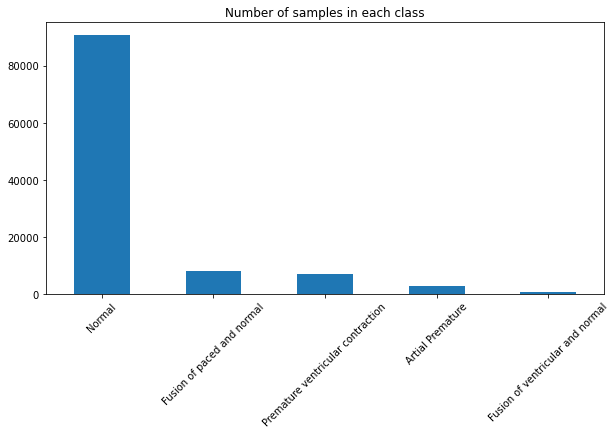

In [2]:
df_mitbih_train = pd.read_csv("../../cardiac_challenge/ecg_dataset/mitbih_train.csv", header = None)
df_mitbih_test = pd.read_csv("../../cardiac_challenge/ecg_dataset/mitbih_test.csv", header = None)

# print shapes of the dataframes
print("The shape of the mitbih_train is : ", df_mitbih_train.shape)
print("The shape of the mitbih_test is : ", df_mitbih_test.shape)

df_mitbih = pd.concat([df_mitbih_train, df_mitbih_test], axis=0)
df_mitbih.rename(columns={187: 'label'}, inplace=True)
df_mitbih_test.rename(columns={187: 'label'}, inplace=True)
df_mitbih_train.rename(columns={187: 'label'}, inplace=True)

id_to_label = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}
#df_mitbih['label'] = df_mitbih.iloc[:, -1].map(id_to_label)

# get the number of columns in the dataframe
# the last column is the label/class
num_cols = df_mitbih.shape[1] - 1 
# the signal was resampled at frequency of 125Hz as the input
# compute the time vector
time = np.arange(0, num_cols) / 125
# convert to milliseconds
time = time * 1000
# print last time value
print("The last time value is : ", time[-1])

# for the first "num_cols" and the time steps as column names
df_mitbih.columns = list(time) + ["label"]

# count the number of samples in each class and plot a bar chart
# change the class names to "normal" and "abnormal"
# count the number of samples in each class
counts = df_mitbih["label"].value_counts()
# substitute the class names
counts.index = counts.index.map(id_to_label)
# create a figure 
plt.figure(figsize = (10, 5))
# plot a bar chart
counts.plot(kind = "bar")
# plot xticks in angle
plt.xticks(rotation = 45)
plt.title("Number of samples in each class")
plt.show()

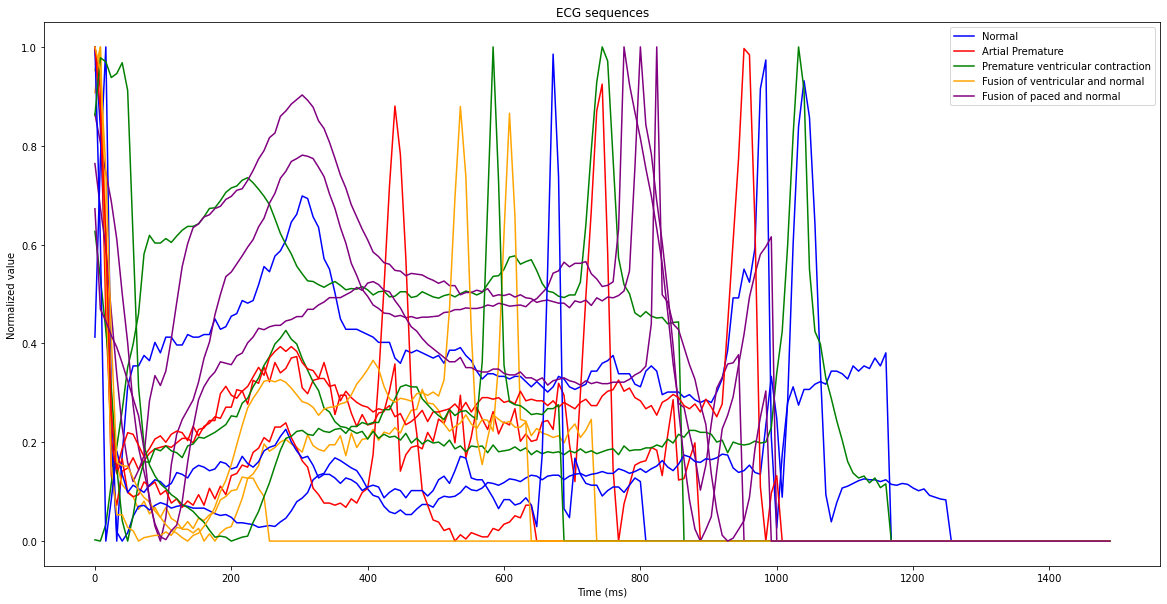

In [3]:
# create a figure
plt.figure(figsize = (20, 10))
# define colors for each class
colors = ["blue", "red", "green", "orange", "purple"]
# plot the normal sequences
for i in range(3):
    for label in id_to_label.keys():
        # sample a random sequence from that label
        df_mitbih_label = df_mitbih[df_mitbih["label"] == label].sample(1)
        # plot the sequence
        if i == 0:
            plt.plot(df_mitbih_label.columns[:-1], df_mitbih_label.iloc[0, :-1], label = id_to_label[label], color = colors[label])
        else:
            plt.plot(df_mitbih_label.columns[:-1], df_mitbih_label.iloc[0, :-1], color = colors[label])  
# create a legend for the plot, blue for normal and red for abnormal
plt.legend()
# set the title
plt.title("ECG sequences")
# y lable is "Normalized value"
plt.ylabel("Normalized value")
# x label is "Time (ms)"
plt.xlabel("Time (ms)")
# show the plot
plt.show()
# close
plt.close()

# Cleaning Up Data

In [4]:
x_train = np.array(df_mitbih_train.drop(columns='label'))
x_test = np.array(df_mitbih_test.drop(columns='label'))
y_train = np.array(df_mitbih_train['label'])
y_test = np.array(df_mitbih_test['label'])

from tensorflow.keras.utils import to_categorical

# reshaping the data
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

num_classes = y_train.shape[1]

/Users/movsesyanae/miniconda3/envs/ml/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Defining Model

In [5]:
from tensorflow import keras

In [6]:
def make_model(input_shape, num_classes):
    input_layer = keras.layers.Input(shape=input_shape)
    
    
    lstm = keras.layers.LSTM(units=1, return_sequences=True)(input_layer)

    # lstm = keras.layers.LSTM(units=187, return_sequences=True)(input_layer)
    # lstm = keras.layers.LSTM(units=num_cols)(input_layer)
    
    # dense = keras.layers.Dense(units=64)(lstm)
    
    # output_layer = keras.layers.Dense(5, activation="softmax")(lstm)
    

    # conv1 = keras.layers.Conv1D(filters=32, kernel_size=1)(input_layer)
    
    # flat = keras.layers.GlobalAveragePooling1D(keep)(lstm)
    
    res = keras.layers.Reshape((187,))(lstm)
    display(lstm.shape)
    output_layer = keras.layers.Dense(5, activation="softmax")(res)    
    return keras.models.Model(inputs=input_layer, outputs=output_layer)
# input shape is 188x1
# num_cols = x_train.shape[1]
# num_classes = y_train.shape[1]
model = make_model((187,1), 5)
display(model.summary())

2023-08-03 14:18:36.872549: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-08-03 14:18:36.872572: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-08-03 14:18:36.872579: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-08-03 14:18:36.872611: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-03 14:18:36.872627: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


TensorShape([None, 187, 1])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 187, 1)]          0         
                                                                 
 lstm (LSTM)                 (None, 187, 1)            12        
                                                                 
 reshape (Reshape)           (None, 187)               0         
                                                                 
 dense (Dense)               (None, 5)                 940       
                                                                 
Total params: 952 (3.72 KB)
Trainable params: 952 (3.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None

In [7]:
callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Train Model

In [8]:
epochs = 30
batch_size = 32

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(x_test, y_test),
    verbose=1,
)

Epoch 1/30


2023-08-03 14:21:01.053600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-03 14:21:01.223003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-03 14:21:02.743027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2737/2737 [==============================] - ETA: 0s - loss: 0.5461 - accuracy: 0.8452

2023-08-03 14:22:07.492583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-03 14:22:07.547973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2737/2737 [==============================] - 77s 27ms/step - loss: 0.5461 - accuracy: 0.8452 - val_loss: 0.4527 - val_accuracy: 0.8645 - lr: 0.0010
Epoch 2/30
2737/2737 [==============================] - 77s 28ms/step - loss: 0.4113 - accuracy: 0.8738 - val_loss: 0.3936 - val_accuracy: 0.8802 - lr: 0.0010
Epoch 3/30
2737/2737 [==============================] - 77s 28ms/step - loss: 0.3764 - accuracy: 0.8835 - val_loss: 0.3691 - val_accuracy: 0.8903 - lr: 0.0010
Epoch 4/30
2737/2737 [==============================] - 76s 28ms/step - loss: 0.3613 - accuracy: 0.8880 - val_loss: 0.3560 - val_accuracy: 0.8885 - lr: 0.0010
Epoch 5/30
2737/2737 [==============================] - 73s 27ms/step - loss: 0.3518 - accuracy: 0.8897 - val_loss: 0.3509 - val_accuracy: 0.8896 - lr: 0.0010
Epoch 6/30
2737/2737 [==============================] - 73s 27ms/step - loss: 0.3454 - accuracy: 0.8918 - val_loss: 0.3440 - val_accuracy: 0.8907 - lr: 0.0010
Epoch 7/30
2737/2737 [==============================] - 7

In [9]:
model.save("t2-lstm-30.h5")

/Users/movsesyanae/miniconda3/envs/ml/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Test Model

In [10]:
model = keras.models.load_model("t2-lstm-30.h5")
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

  5/685 [..............................] - ETA: 10s - loss: 0.1118 - accuracy: 0.9812 

2023-08-03 15:00:38.795876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-03 15:00:38.850251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


685/685 [==============================] - 9s 13ms/step - loss: 0.2910 - accuracy: 0.9235
Test accuracy 0.9235337376594543
Test loss 0.2910092771053314


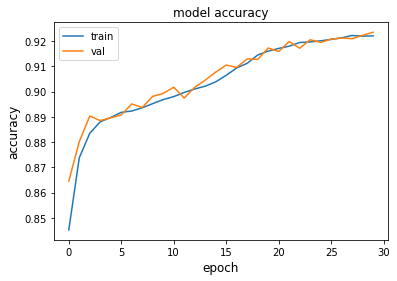

In [11]:
metric = "accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

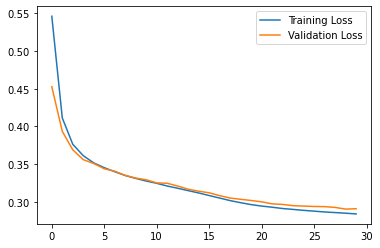

In [12]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [13]:
n=24  #Select the index of image to be loaded for testing
data = x_test[n]
# display(data)
input_img = np.expand_dims(data, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

2023-08-03 15:01:04.909167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-03 15:01:05.023680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 723ms/step
The prediction for this image is:  [[9.8971784e-01 8.5117035e-03 1.6987495e-03 4.2363357e-05 2.9320185e-05]]
The actual label for this image is:  [1. 0. 0. 0. 0.]


In [14]:
y_pred = model.predict(x_test)
cce = keras.losses.CategoricalCrossentropy()
loss = cce(y_test, y_pred).numpy()
print('categorical crossentropy:', loss)

685/685 [==============================] - 5s 7ms/step
categorical crossentropy: 0.29045993
